## Q- We have the min and max temperatures in a city In India for each months of the year.We would like to find a function to describe this and show it graphically, the datasetgiven below.

In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.DataFrame({"Max":[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25],
                  "Min":[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]})
df.head()

,Max,Min
0,39,21
1,41,23
2,43,27
3,47,28
4,49,32


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Min and max temperature')

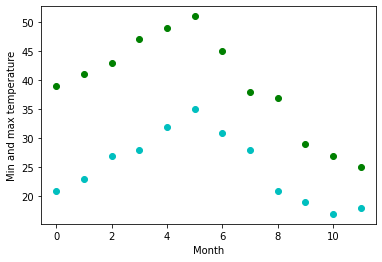

In [24]:
months = np.arange(12)
plt.plot(months, df["Max"], 'go')
plt.plot(months, df["Min"], 'co')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [25]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      df["Max"], [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      df["Min"], [-40, 20, 0])

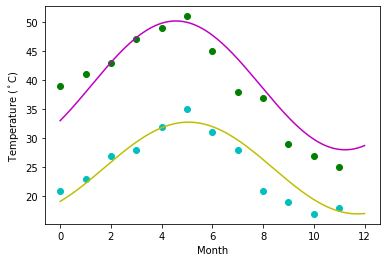

In [26]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, df["Max"], 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, df["Min"], 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()